# Case Study
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. It is Vital for any Organization/Person/Political Party to sense the pulse of people about them which helps them come up with policy and strategy.

# Problem Statement
We need to identify the malignant comments using comments column from given train data. It's an classification problem, we need to find the best fit model to identify the malignant comments.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings('ignore')

## Importing data

In [2]:
train_df=pd.read_csv("C:/Users/Sankalp/Malignant Comments Classifier Project/train.csv")
test_df=pd.read_csv("C:/Users/Sankalp/Malignant Comments Classifier Project/test.csv")

In [4]:
# Exploring the data
print(train_df.shape)
print(test_df.shape)

(159571, 8)
(153164, 2)


In [20]:
train_df.head(40)
# Let's remove id column, as it doesn't seems to be of great advantage.
# We need to explore and convert text column comment_text to vector, to train and get generalized the model.

comment_text  malignant  \
0   Explanation\nWhy the edits made under my usern...          0   
1   D'aww! He matches this background colour I'm s...          0   
2   Hey man, I'm really not trying to edit war. It...          0   
3   "\nMore\nI can't make any real suggestions on ...          0   
4   You, sir, are my hero. Any chance you remember...          0   
5   "\n\nCongratulations from me as well, use the ...          0   
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   
7   Your vandalism to the Matt Shirvington article...          0   
8   Sorry if the word 'nonsense' was offensive to ...          0   
9   alignment on this subject and which are contra...          0   
10  "\nFair use rationale for Image:Wonju.jpg\n\nT...          0   
11  bbq \n\nbe a man and lets discuss it-maybe ove...          0   
12  Hey... what is it..\n@ | talk .\nWhat is it......          1   
13  Before you start throwing accusations and warn...          0   
14  Oh, and the girl above started her arguments w...          0   
15  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...          0   
16  Bye! \n\nDon't look, come or think of comming ...          1   
17   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski          0   
18  The Mitsurugi point made no sense - why not ar...          0   
19  Don't mean to bother you \n\nI see that you're...          0   
20  "\n\n Regarding your recent edits \n\nOnce aga...          0   
21  "\nGood to know. About me, yeah, I'm studying ...          0   
22  "\n\n Snowflakes are NOT always symmetrical! \...          0   
23  "\n\n The Signpost: 24 September 2012 \n\n Rea...          0   
24  "\n\nRe-considering 1st paragraph edit?\nI don...          0   
25  Radial symmetry \n\nSeveral now extinct lineag...          0   
26  There's no need to apologize. A Wikipedia arti...          0   
27  Yes, because the mother of the child in the ca...          0   
28  "\nOk. But it will take a bit of work but I ca...          0   
29  "== A barnstar for you! ==\n\n  The Real Life ...          0   
30  How could I post before the block expires?  Th...          0   
31  Not sure about a heading of 'Fight for Freedom...          0   
32  Praise \n\nlooked at this article about 6 mont...          0   
33  I was able to post the above list so quickly b...          0   
34  "\nWell, not ""before the process"" but ""befo...          0   
35  "\n\nNot at all, you are making a straw man ar...          0   
36  "\n\n ""Mainland Asia"" includes ""the lower b...          0   
37  pretty much everyone from warren county/surrou...          0   
38  Hi Explicit, can you block O Fenian for edit-w...          0   
39  Notability of Rurika Kasuga\nA tag has been pl...          0   

    highly_malignant  rude  threat  abuse  loathe  
0                  0     0       0      0       0  
1                  0     0       0      0       0  
2                  0     0       0      0       0  
3                  0     0       0      0       0  
4                  0     0       0      0       0  
5                  0     0       0      0       0  
6                  1     1       0      1       0  
7                  0     0       0      0       0  
8                  0     0       0      0       0  
9                  0     0       0      0       0  
10                 0     0       0      0       0  
11                 0     0       0      0       0  
12                 0     0       0      0       0  
13                 0     0       0      0       0  
14                 0     0       0      0       0  
15                 0     0       0      0       0  
16                 0     0       0      0       0  
17                 0     0       0      0       0  
18                 0     0       0      0       0  
19                 0     0       0      0       0  
20                 0     0       0      0       0  
21                 0     0       0      0       0  
22                 0     0       0      0       0  
23  

In [8]:
test_df.head(10)
# We will remove id column from test data as well before applying the trained model

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.
5  0001ea8717f6de06  Thank you for understanding. I think very high...
6  00024115d4cbde0f  Please do not add nonsense to Wikipedia. Such ...
7  000247e83dcc1211                   :Dear god this site is horrible.
8  00025358d4737918  " \n Only a fool can believe in such numbers. ...
9  00026d1092fe71cc  == Double Redirects == \n\n When fixing double...

In [9]:
# Removing id column
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [10]:
train_df.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  
0                 0     0       0      0       0  
1                 0     0       0      0       0  
2                 0     0       0      0       0  
3                 0     0       0      0       0  
4                 0     0       0      0       0

In [18]:
# As we have multiple response variables. Let's combine the columns into one.

In [19]:
train_df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [12]:
train_df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [13]:
train_df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [14]:
train_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [15]:
train_df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [16]:
train_df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [17]:
# As we can see the data is imbalanaced.
# Let's check the accuracy of the models on the imbalanced data set, later on we will try to balance the data set.

In [21]:
# As we can see malignants are highly observed comparative to other. Let's explore thorugh distribution plots

In [22]:
# Subsets of labels from the training data
tr_labels = train_df[['malignant', 'highly_malignant',
                      'rude', 'threat', 'abuse', 'loathe']]
label_count = tr_labels.sum()

In [23]:
label_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

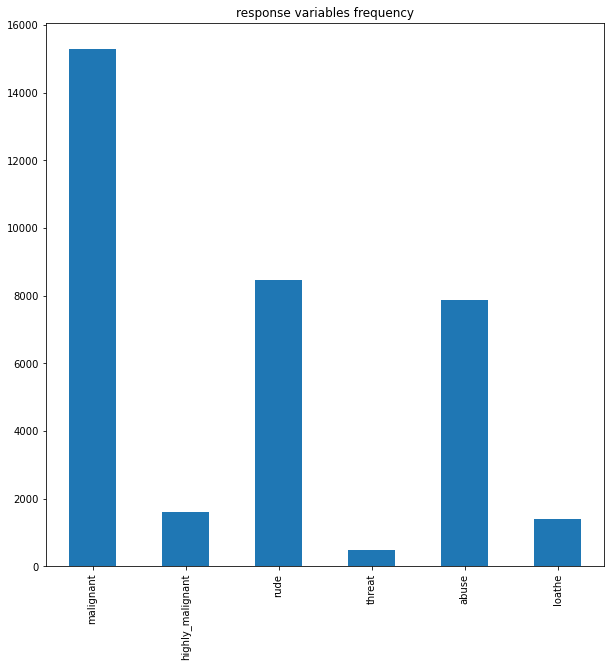

In [26]:
plt.figure(figsize=(10,10))
label_count.plot(kind='bar',title='response variables frequency')
# The data is imbalanaced as observed earlier, that's natural most of the comments are not malignant.

In [28]:
# This is an malignant comment as seen clearly
train_df.comment_text[6]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

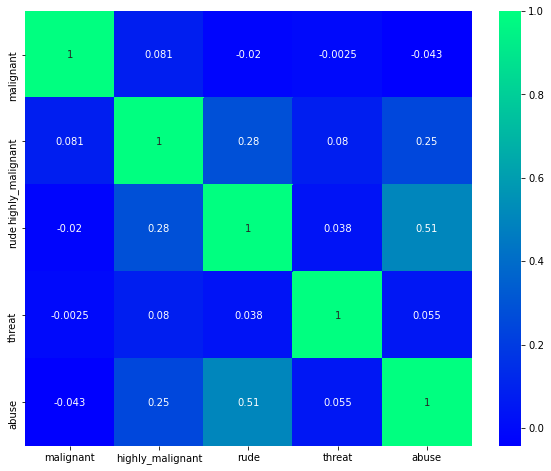

In [37]:
# Cross correlation matrix across labels
rowsums = train_df.iloc[:, 1:].sum(axis=1)
temp = train_df.iloc[:, 1:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="winter")

Rude and abuse are highly correlated to each other. Implies most of the rude comments are going to be abusive.

In [38]:
# Importing libraries wordcloud and collections libraries
from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline


In [39]:
def fnWordCloud(token):
    #Input to the function is feature name
    """
    Visualizing the most common words.
    """
    threat_context = train_df[train_df[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Choose a class to visualize the most common words contributing to the class:malignant


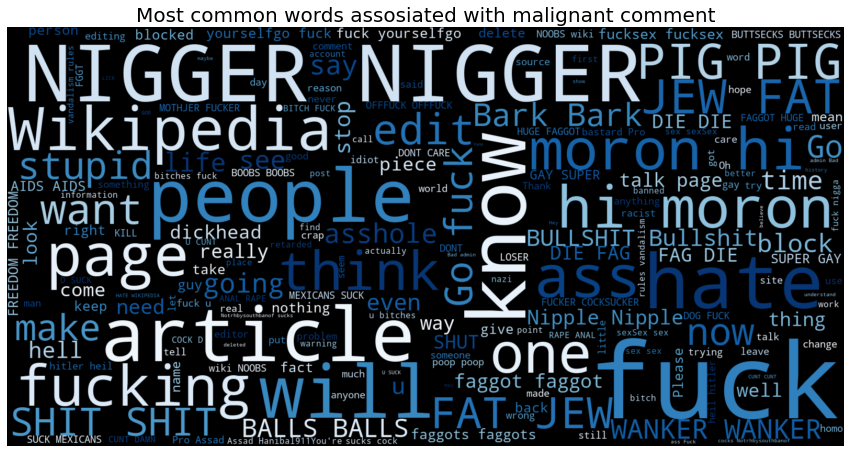

In [40]:
#Input is malignant
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token.lower())

Choose a class to visualize the most common words contributing to the class:highly_malignant


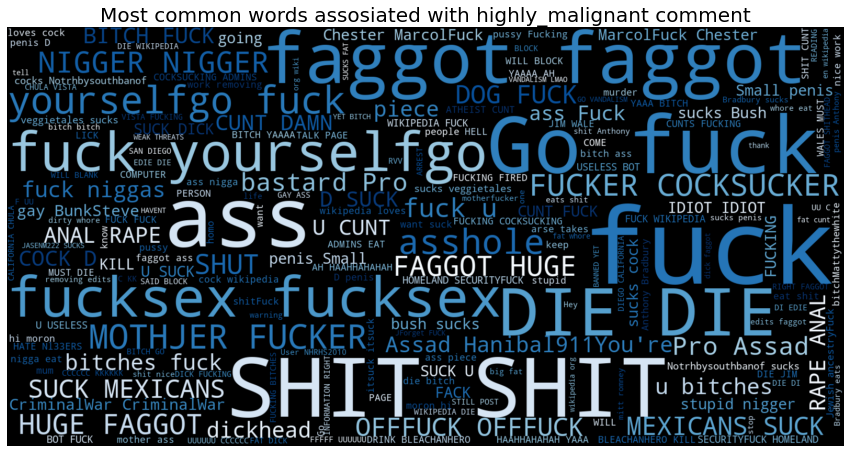

In [41]:
#Input is highly malignant
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token.lower())

Choose a class to visualize the most common words contributing to the class:threat


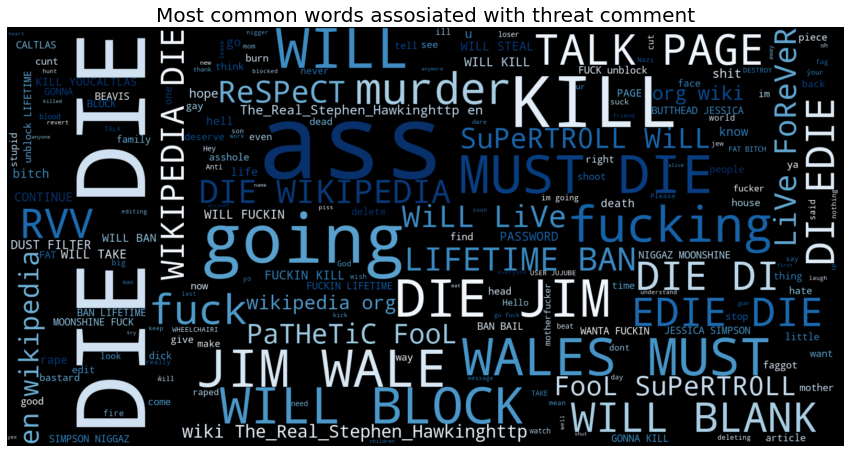

In [42]:
#Input is threat
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token.lower())

Choose a class to visualize the most common words contributing to the class:abuse


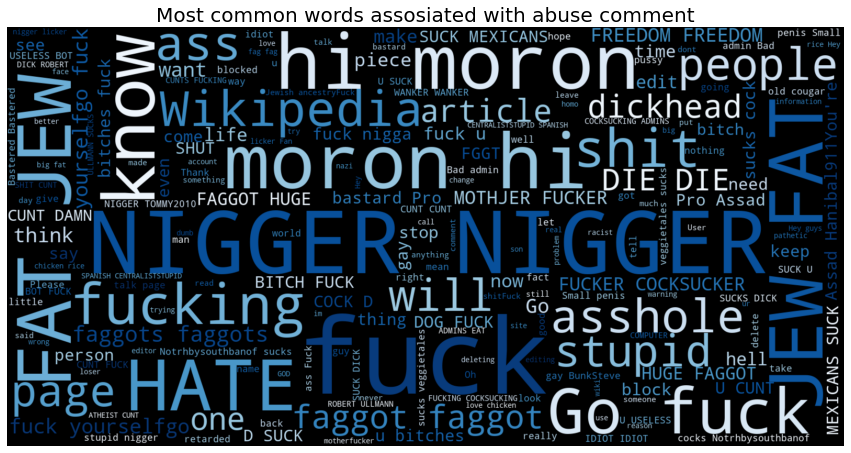

In [43]:
#Input is abuse
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token.lower())

## Feature Engineering

In [46]:
train_df['comment_text']=train_df['comment_text'].str.lower()
test_df['comment_text']=test_df['comment_text'].str.lower()

In [48]:
# Replace email address by NULL string
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"")

#Replace URLs with NULL string
train_df['comment_text'] = train_df['comment_text'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',"")

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

#Replace numbers with NULL string
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', "")

In [49]:
# Replace punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', '')

#Replace spaces by single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Replace remove trailing and leading whitespaces
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')


In [51]:
# Removing words with length <=2, since research shows that they doesn't carry significant meaning.
for iIter in range(train_df.shape[0]):
    train_df['comment_text'][iIter]=" ".join([sWord for sWord in nltk.word_tokenize(train_df['comment_text'][iIter]) if len(sWord)>2])

In [53]:
# Importing NLTK library and stopwords corpus
from nltk.corpus import stopwords
import nltk
import string

In [54]:
# Remove stopwords. I found iss, nus and edu. While observing few emails manually, further observations will definitely
# take more time.
stop_words = set(stopwords.words('english') )

#Removing stopwords from text
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [58]:
print(train_df['comment_text'][100])
print('*'*200)
print(train_df['comment_text'][100000])
print('*'*200)
print(train_df['comment_text'][150000])
print('*'*200)

however moonlite edit noted golden daph optus wake wikkis funny
********************************************************************************************************************************************************************************************************
think meets notability guidelines thanks creating page big icon pageant drag community draggay community general death covered several mainstream media outlets
********************************************************************************************************************************************************************************************************
addition wikipedia situation fair use image shouldnt used counterexample showing fairuse section
********************************************************************************************************************************************************************************************************


# Model Selection

In [82]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
# Creating classifiers with default parameters initially.
clf1 = MultinomialNB()
clf2 = LogisticRegression()
clf3 = LinearSVC()

In [66]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                        stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X = vector.fit_transform(train_df['comment_text'])


In [74]:
# Finding the best fit ML algo's and tuning random state.
MLAlgos_list=[LogisticRegression(),LinearSVC(),MultinomialNB()]
list_outCols=['malignant','highly_malignant','rude','threat','abuse','loathe']
for sActiveCol in list_outCols:
    y=train_df[sActiveCol]
    for algo in MLAlgos_list:
        max_acc=0
        active_acc=0
        iBest_rs=0
        model=algo
        for iActive_rs in range(42,101):
            x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=iActive_rs, test_size=0.2)
            model.fit(x_train,y_train)
            pred=model.predict(x_test)
            active_acc=accuracy_score(pred,y_test)
            if active_acc>max_acc:
                max_acc=active_acc
                iBest_rs=iActive_rs
        print("Best accuracy for col {}, {} algo is {} for random state {}.".format(sActiveCol, algo,max_acc,iBest_rs))
#Observation:
# malignant: Best fit model is LinearSVC at random state 97
# highly malignant: Best fit model is LinearSVC at random state 94
# rude: Best fit model is LinearSVC at random state 68
# threat: Best fit model is LinearSVC at random state 55
# abuse: Best fit model is LinearSVC at random state 84
# loathe: Best fit model is LinearSVC at random state 43
# for all the output features 

Best accuracy for col malignant, LogisticRegression() algo is 0.958890803697321 for random state 86.
Best accuracy for col malignant, LinearSVC() algo is 0.9619614601284663 for random state 97.
Best accuracy for col malignant, MultinomialNB() algo is 0.9501174996083347 for random state 65.
Best accuracy for col highly_malignant, LogisticRegression() algo is 0.991947360175466 for random state 98.
Best accuracy for col highly_malignant, LinearSVC() algo is 0.991132696224346 for random state 94.
Best accuracy for col highly_malignant, MultinomialNB() algo is 0.9913206955976813 for random state 68.
Best accuracy for col rude, LogisticRegression() algo is 0.9791320695597682 for random state 68.
Best accuracy for col rude, LinearSVC() algo is 0.9813880620397932 for random state 68.
Best accuracy for col rude, MultinomialNB() algo is 0.9708914303618988 for random state 75.
Best accuracy for col threat, LogisticRegression() algo is 0.9977753407488642 for random state 42.
Best accuracy for col 

In [78]:
# Hypertuning the parameters of LinearSVC using GridSearchCV
from sklearn.model_selection import GridSearchCV
y=train_df['malignant']
parameters={'penalty':['l1', 'l2'],'loss':['hinge','squared_hinge']}
LSV=LinearSVC()
SVC_BestFit=GridSearchCV(LSV,parameters)
SVC_BestFit.fit(X,y)
print(SVC_BestFit.best_params_)

{'loss': 'hinge', 'penalty': 'l2'}


In [79]:
# As observed above, LinearSVC with parameters i.e., lass as hinge and penalty of 12

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=97)

Best_fit_Alg=LinearSVC(penalty='l2',loss='hinge')

Best_fit_Alg.fit(X_train,Y_train)

y_pred= Best_fit_Alg.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9613716692151505


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     36090
           1       0.90      0.67      0.77      3803

    accuracy                           0.96     39893
   macro avg       0.93      0.83      0.87     39893
weighted avg       0.96      0.96      0.96     39893



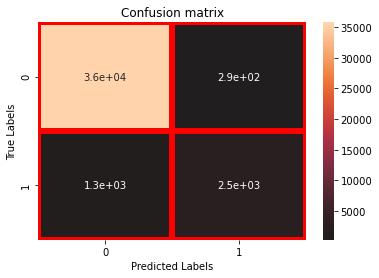

In [80]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

# Observation:
# i. TP and TN values are high, our predictions are spot on despite of having an imbalanced data set.

In [84]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(Best_fit_Alg,'Malignment_Comments.pkl')

['Malignment_Comments.pkl']